In [63]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
house = pd.read_csv('kc_house_data_train.csv', index_col = 0)

In [5]:
house.groupby('zipcode')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
zipcode,,,,,,,,
98001,284.0,2.819988e+05,99401.111630,100000.0,215875.00,261000.0,315587.5,850000.0
98002,157.0,2.322865e+05,53328.749140,111300.0,195000.00,229950.0,267000.0,389000.0
98003,224.0,2.907627e+05,107220.215114,128000.0,228225.00,265000.0,320000.0,950000.0
98004,237.0,1.396883e+06,798005.277142,425000.0,860000.00,1208000.0,1700000.0,7062500.0
98005,140.0,8.088476e+05,272741.690225,411100.0,637775.00,761225.0,900000.0,1960000.0
...,...,...,...,...,...,...,...,...
98177,218.0,6.552490e+05,426283.461389,245560.0,421250.00,532550.0,699750.0,3800000.0
98178,215.0,3.126811e+05,165359.829952,90000.0,226000.00,279000.0,345050.0,1700000.0
98188,109.0,2.890318e+05,104476.504249,110000.0,230000.00,265000.0,335000.0,707000.0


In [14]:
house['bedrooms'] = [x if x != 33 else 3 for x in house['bedrooms']]

In [62]:
house.shape

(17290, 21)

In [9]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
house.groupby('view')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
view,,,,,,,,
0,15571.0,4.967704e+05,289376.584387,75000.0,311800.0,432000.0,600000.0,5570000.0
1,264.0,8.137702e+05,517985.318817,217000.0,513750.0,690944.0,921250.0,3650000.0
2,775.0,7.794212e+05,514773.042599,169317.0,480000.0,672500.0,925000.0,7062500.0
3,410.0,9.640048e+05,630633.734807,154000.0,550000.0,799450.0,1250000.0,7700000.0
4,270.0,1.481651e+06,984931.922695,285000.0,816250.0,1175000.0,1899750.0,6885000.0


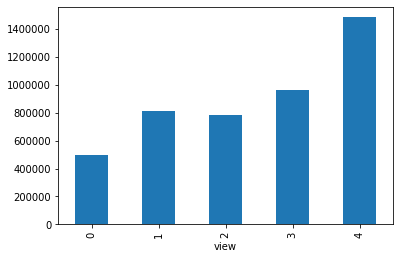

In [7]:
house.groupby('view')['price'].mean().plot.bar()

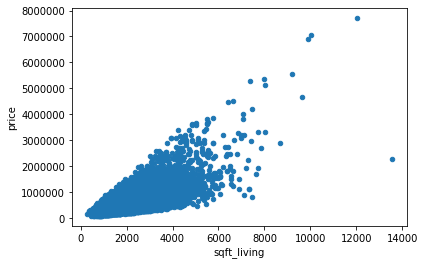

In [15]:
house.plot.scatter('sqft_living', 'price')

# standard linear regression

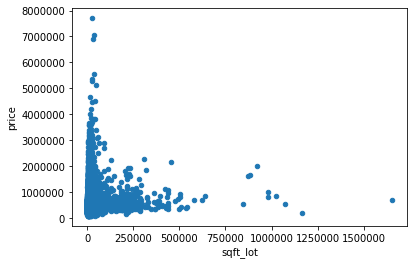

In [16]:
house.plot.scatter('sqft_lot', 'price')

# ??? weird curve

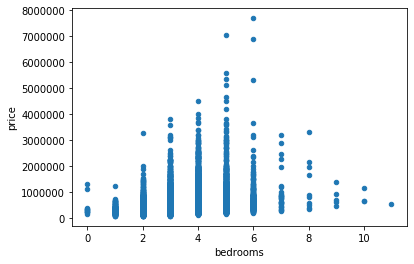

In [17]:
house.plot.scatter('bedrooms', 'price')

# ??? not sure what this could mean, possibly remove or group up 

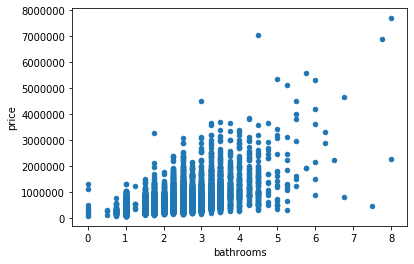

In [18]:
house.plot.scatter('bathrooms', 'price')

# fairly linear but still not a great indicator

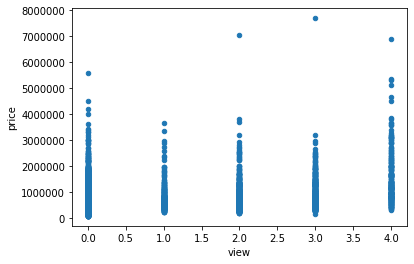

In [23]:
house.plot.scatter('view', 'price')

# view doesnt seem to have a great relation

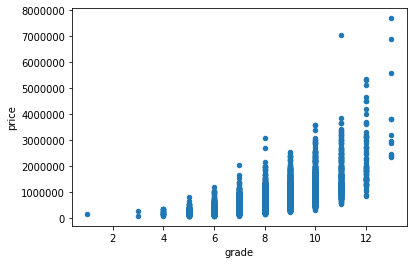

In [29]:
house.plot.scatter('grade', 'price')

# some linear relation but possibly a logistic relation 

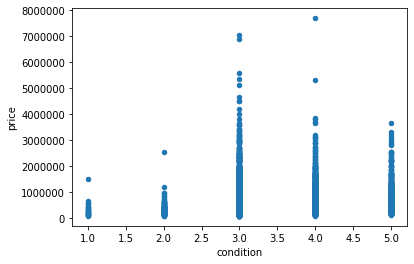

In [30]:
house.plot.scatter('condition', 'price')

# possibly groupy by 3 and higher or less than 3 since there is a big difference

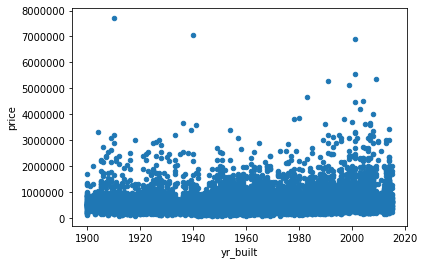

In [31]:
house.plot.scatter('yr_built', 'price')

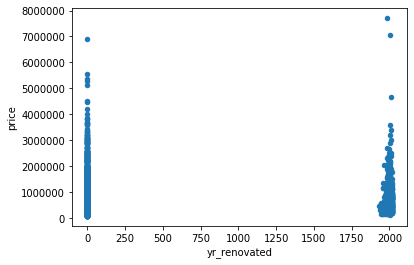

In [34]:
house.plot.scatter('yr_renovated', 'price')

In [ ]:
# for the year columns, we could add them together and put it as a column of years since last reno

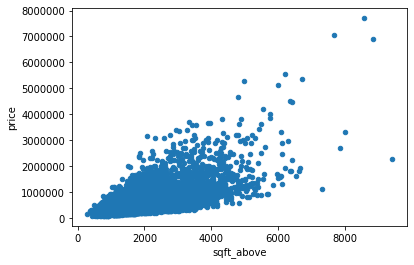

In [35]:
house.plot.scatter('sqft_above', 'price')

# very similar to sqft_living so possibly 

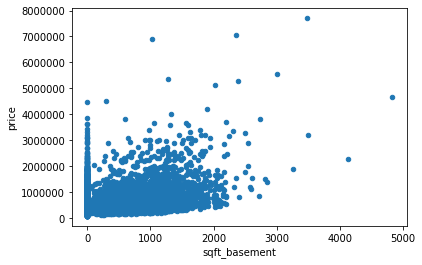

In [36]:
house.plot.scatter('sqft_basement', 'price')

# some linearity but not very (possibly create a column of 0s and 1 to see 
# if they place has a basement and if there is any correlation)

In [67]:
view_dummy = pd.get_dummies(house['view'],prefix = 'view', drop_first=True)

In [68]:
view_dummy

,view_1,view_2,view_3,view_4
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0
...,...,...,...,...
17285,1,0,0,0
17286,0,0,0,0
17287,0,0,0,0
17288,0,0,0,0


In [69]:
price_col = house['price']

In [70]:
price_col = price_col.to_frame()

In [71]:
price_by_view = pd.concat([price_col, view_dummy], axis = 1, sort = False)

In [72]:
price_by_view

,price,view_1,view_2,view_3,view_4
0,365000.0,0,0,0,0
1,865000.0,0,0,0,0
2,1038000.0,0,1,0,0
3,1490000.0,0,1,0,0
4,711000.0,0,0,0,0
...,...,...,...,...,...
17285,750000.0,1,0,0,0
17286,440000.0,0,0,0,0
17287,310000.0,0,0,0,0
17288,427500.0,0,0,0,0


In [77]:
lr_views_model = ols(formula = 'price~view_1+view_2+view_3+view_4', data = price_by_view).fit()

In [78]:
lr_views_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     876.8
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        10:46:00   Log-Likelihood:            -2.4477e+05
No. Observations:               17290   AIC:                         4.895e+05
Df Residuals:                   17285   BIC:                         4.896e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.968e+05   2728.085    182.095      0.000    4.91e+05    5.02e+05
view_1       3.17e+05   2.11e+04     15.004      0.000    2.76e+05    3.58e+05
view_2      2.827e+05   1.25e+04     22.560      0.000    2.58e+05    3.07e+05
view_3      4.672e+05    1.7e+04     27.433      0.000    4.34e+05    5.01e+05
view_4      9.849e+05   2.09e+04     47.132      0.000    9.44e+05    1.03e+06
==============================================================================
Omnibus:                    14976.743   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1031331.288
Skew:                           3.821   Prob(JB):                         0.00
Kurtosis:                      40.056   Cond. No.                         8.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
grades = []

for x in house['grade']:
    if x <= 3:
        grades.append(1)
    elif x > 3 and x <=6:
        grades.append(2)
    elif x > 6 and x <= 9:
        grades.append(3)
    else:
        grades.append(4)
        

In [102]:
house['grade'] = grades

In [103]:
grade_dummy = pd.get_dummies(house['grade'],prefix = 'grade', drop_first=False)

In [104]:
grade_dummy.columns = ['grade_1','grade_2','grade_3','grade_4']

In [105]:
grade_dummy.drop('grade_3', axis = 1, inplace = True)

In [106]:
price_by_grade = pd.concat([price_col, grade_dummy], axis = 1, sort = False)

In [108]:
lr_grades_model = ols(formula = 'price~grade_1+grade_2+grade_4', data = price_by_grade).fit()

In [109]:
lr_grades_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     3004.
Date:                Fri, 01 May 2020   Prob (F-statistic):               0.00
Time:                        10:55:35   Log-Likelihood:            -2.4274e+05
No. Observations:               17290   AIC:                         4.855e+05
Df Residuals:                   17286   BIC:                         4.855e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.059e+05   2546.392    198.686      0.000    5.01e+05    5.11e+05
grade_1    -3.463e+05   1.75e+05     -1.981      0.048   -6.89e+05   -3687.458
grade_2    -2.104e+05   7462.542    -28.195      0.000   -2.25e+05   -1.96e+05
grade_4      7.68e+05   8788.261     87.395      0.000    7.51e+05    7.85e+05
==============================================================================
Omnibus:                    15604.233   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1488690.951
Skew:                           3.968   Prob(JB):                         0.00
Kurtosis:                      47.760   Cond. No.                         76.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""